# Изучение Hadoop, MapReduce, PySpark 

## Ресурсы для изучения

- [Настольная книга Data Analysis with Python and PySpark](https://cloud.mail.ru/public/Y5En/NP3DUte5B)
- [Документация PySpark](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/functions.html) 
- [Hadoop. Система для обработки больших объемов данных](https://stepik.org/course/150) - обязательно

# Теория

## Hadoop

- Для отказоустойчивых, масштабируемых и распределенных вычислений
- Работает с BigData на обычных серверах
- Много различных продуктов и средств
- Ближе к файловой системе на компьютере нежели, чем к БД

#### Принципы Hadoop:
- Горизонтальное масштабирование вместо вертикального
- Отправляем код к данным (для уменьшения нагрузки на сеть, не будет необходимости гонять большой пул данных, вместо этого копируется только код к данным, этот код исполняется на локально расположенных данных и возвращает только результат)
- Уметь обрабатывать падения и отказы оборудования (чем больше количество машин, тем чаще будут отказы железа и это должно быть рутинной проблемой с которой умеют уже работать (репликация данных, перезапуск тасков, планирование где что запуститься в случае отказа оборудования))
- Инкапсуляция сложности работы распределенных и многопоточных приложений

Изначально Hadoop был известен в основном из-за двух ключевых компонент:
- HDFS: Hadoop Distributed FileSystem
- MapReduce: Фреймворк распределенной обработки данных

Сейчас, в дополнении к этому, также известны следующие продукты:

- Hbase: Column-oriented DB, поддержка последовательного и произвольного чтения, поддержка простых запросов
- Zookeeper: Highly-Available Coordination Service
- Oozie: Диспетчер задача для Hadoop
- Pig: Язык обработки данных и среда выполнения
- Hive: Data warehouse c SQL интерфейсом

## HDFS

Логически объединяет все жесткие диски в один жесткий диск(типо Google Drive)  
Работает поверх обычных файловых систем  
Хорош для хранения больших файлов(лучше не сильно много больших файлов, чем много маленьких), стриминга данных (файл один раз пишется и много раз читается, а также под обработку файла целеком), обычных серверов

<h4> Узлы HDFS </h4>
Для управления файловой системой есть два основных типа
узлов

- Namenode (Отвечает за файловое пространство (namespace), мета-информацию и расположение блоков файлов, Запускается на выделенной машине (иногда добавляют secondary namenode)\
-  Datanode (Хранит и отдает блоки данных, Отправляет ответы о состоянии на Namenode, Запускается обычно на всех машинах кластера)  

#### Файлы в HDFS
- Файлы в HDFS состоят из блоков (блок – единица хранения данных)
- Управляется через Namenode (какой файл, где он хранится и как он бьется на блоки)
- Хранится на Datanode
- Реплицируются по машинам в процессе записи (для отказоустойчивости)
    - Один и тот же блок хранится на нескольких Datanode
- Фактор репликации по умолчанию равен 3

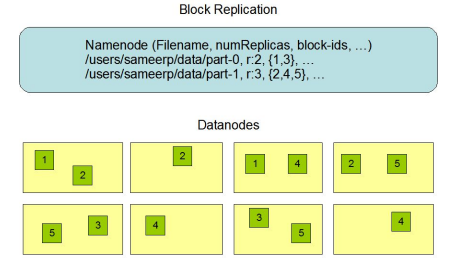

#### Принцип работы
- Namenode не выполняет непосредственно операций чтения/записи данных
    - Это одна из причин масштабируемости Hadoop
- Клиент обращается к Namenode для получения информации о размещении блоков для чтения/записи
- Клиент взаимодействует напрямую с Datanode для чтения/записи данных

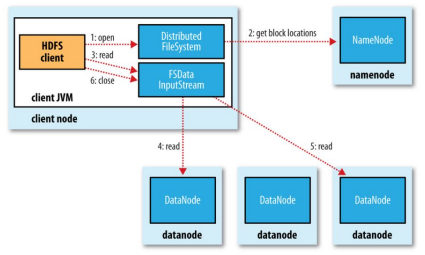

#### Запись файла

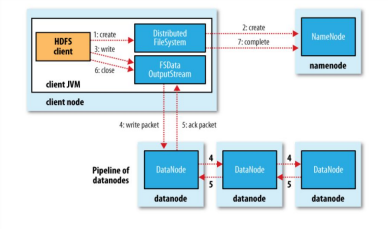

## MapReduce

- Самая известная парадигма обработки больших данных
- Предложена компанией Google в 2004 году
- Имеет множество имплементаций (в том числе open source)   
Т.е. по сути это идея как можно обрабатывать большие данные, а вот реализаций этой идеи большое количество

#### Схема работы

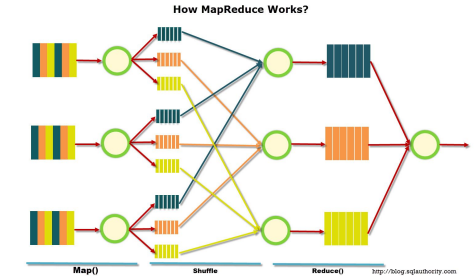

1. Map - на вход принимаем какой-то исходный объект, а на выходе генерируем множество пар ключ-значение (предобработка данных и выделить в них ключ по которому данные будут агрегированы)
2. Shuffle - данные сортируются по ключу и распределяются по редьюсерам
3. Reduce - данные обладающие одним ключом обрабатываются вместе, например, складываются

#### MapReduce работает поверх демонов JobTracker и TaskTracker
- JobTracker
    - Управляет запуском тасков и определяет, на каком TaskTracker таск будет запущен
    - Управляет процессом работы MapReduce задач (jobs)
    - Мониторит прогресс выполнения задач
    - Перезапускает зафейленные или медленные таски
- MapReduce имеет систему ресурсов основанную на слотах (slots)
    - На каждом TaskTracker определяется, сколько будет запущено слотов
    - Таск запускается в одном слоте
    - M мапперов + R редьюсеров = N слотов

#### Другие инструменты Hadoop

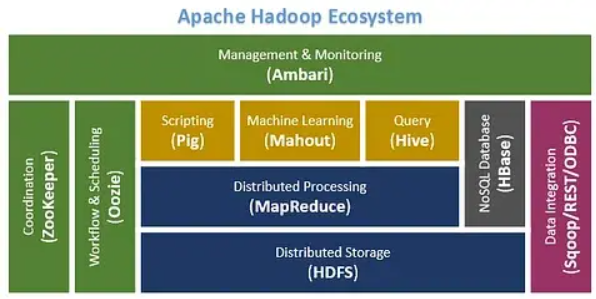

- Hive - транслятор SQL-like запросов в цепочки MapReduce запросов
- HBase - колоночная база данных

### Spark

Для итеративных задач и интерактивной аналитики требуются одна вещь, которой нет в MapReduce   
    - Эффективных примитивов для общих данных (Efficient primitives for data sharing)
- В MapReduce единственный способ для обмена данными между задачами (jobs), это надежное хранилище (stable storage)
- Репликация также замедляет систему, но это необходимо для обеспечения fault tolerance 

Spark в то время пытается
- ускорить работу с данными, за счет того что мы выкидываем необходимость в постоянном сохранении результатов на жесткий диск, вместо этого хранит в оперативке
- сделать более эффективную программную модель

Resilient Distributed Datasets (RDD)
- Задача - Разработать дизайн абстракции распределенной памяти с поддержкой fault tolerant и эффективности
- Абстрактное представление распределенной RAM
- Immutable коллекция объектов распределенных по всему кластеру
- RDD делится на партиции, которые являются атомарными частями информации
- Партиции RDD могут хранится на различных нодах кластера

#### Программная модель
- Основана на parallelizable operators
- Эти операторы являются функциями высокого порядка, которые выполняют user-defined функции параллельно
- Поток обработки данных состоит из любого числа data sources, operators и data sinks путем соединения их inputs и outputs 

#### DAG - направленный ациклический граф

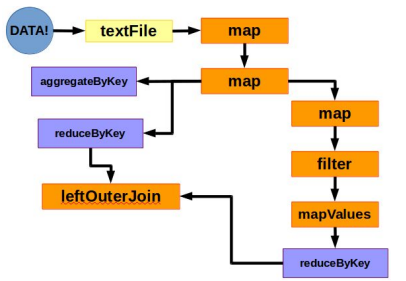

#### Основные операторы
Существует два типа операторов – transformations и actions
- Transformations:
    - lazy-операторы, которые создают новые RDD (Создают новый RDD из существующего (например, map, filter).)
- Actions:
    - запускают вычисления и возвращают результат в программу или пишут данные во внешнее хранилище (Возвращают значение после выполнения вычислений на RDD (например, count, collect).)

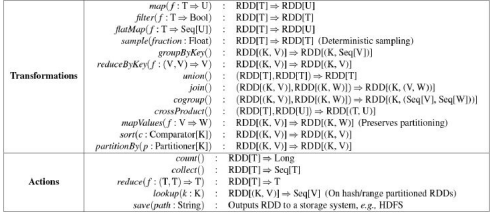

DataFrame
DataFrame — это распределенная коллекция данных, организованная в виде именованных колонок, аналогично таблице в базе данных или DataFrame в pandas. DataFrame предоставляет оптимизированный API для работы с данными и поддерживает различные источники данных.

DataFrame в PySpark позволяет выполнять SQL-запросы, что делает его удобным инструментом для аналитиков данных, привыкших работать с реляционными базами данных. Он также поддерживает различные методы для манипуляции данными, такие как фильтрация, агрегация и объединение.

SparkSession
SparkSession — это точка входа для работы с PySpark. Она предоставляет интерфейс для создания DataFrame и выполнения SQL-запросов.
SparkSession объединяет функциональность SparkContext, SQLContext и HiveContext, что делает его удобным инструментом для работы с данными в PySpark. Он также поддерживает настройку параметров Spark, что позволяет оптимизировать производительность приложений.

#### Shared Variable
- Когда Spark запускает выполнение функции параллельно как набор тасков на различных нодах, то отправляется копия каждой переменной, используемой в функции, на каждый таск
- Иногда нужно, чтобы переменная была общая между тасками или между тасками программой-драйвером

- Обновления переменных нераспространяются обратно в вызывающую
- Использование обычных read-write общих переменные между тасками неэффективно
    - К примеру, необходимо отправить на каждую ноду большой датасет
- Есть два типа shared variables
    - broadcast variables (read-only переменнная для передачи какого-то параметра, не отсылается на ноду больше одного раза)
    - accumulators (могут использоваться для реализации счетчиков и сумматоров)

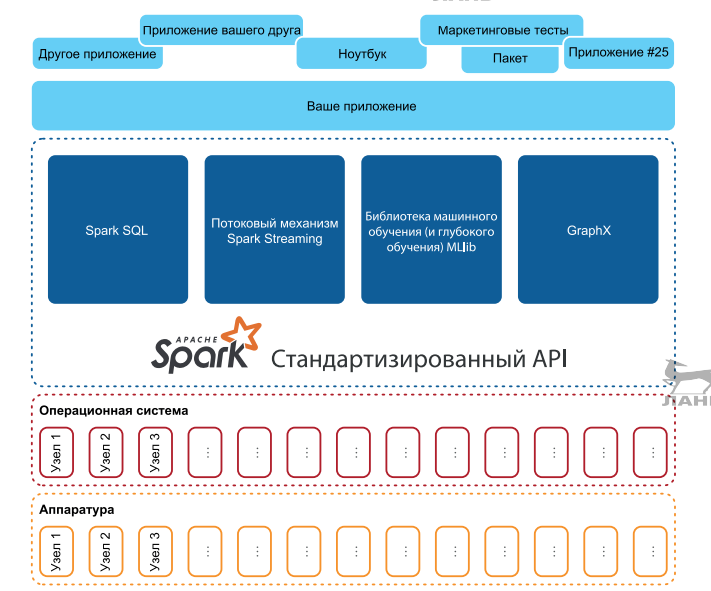

## Теоретические вопросы для повторения

**Вопросы по PySpark**

1. Что такое PySpark, и какие задачи он решает?
1. В чем основные отличия PySpark от pandas?
1. Как PySpark работает с большими данными?
1. Объясните, что такое RDD (Resilient Distributed Dataset)?
1. Что такое DataFrame в PySpark, и чем он отличается от RDD?
1. В чем разница между локальным режимом и кластерным режимом работы Spark?
1. Что такое DAG (Directed Acyclic Graph) в Spark, и как он используется?
1. Какие основные операции можно выполнять с RDD?
1. Что такое трансформации и действия (transformations и actions) в PySpark?
1. Что такое схема (schema) в DataFrame?
1. Что такое Catalyst Optimizer?
1. Как работает ленивое выполнение (lazy evaluation)?
1. Что такое broadcast-переменные?
1. Как Spark оптимизирует shuffle операции?
1. Как можно кэшировать данные в Spark?

**Вопросы по Hadoop**

1. Что такое HDFS (Hadoop Distributed File System), и как он работает?
2. Какие преимущества имеет Hadoop перед традиционными системами обработки данных?
3. Объясните концепцию MapReduce и как она применяется в Hadoop.
4. Что такое NameNode и DataNode в HDFS?
5. Какие основные компоненты входят в Hadoop экосистему?
6. Чем отличается Hadoop от Spark?
7. Какие задачи выполняет YARN (Yet Another Resource Negotiator)?
8. Что такое блоки данных в HDFS, и почему они имеют фиксированный размер?
9. Как Hadoop обрабатывает сбои узлов в кластере?
10. Объясните, что такое репликация данных в HDFS.
11. Какие существуют режимы работы Hadoop (Standalone, Pseudo-Distributed, Fully-Distributed)?
12. Что такое Secondary NameNode, и какова его роль?
13. Как происходит чтение и запись данных в HDFS?
14. Что такое Sqoop, и как он используется в экосистеме Hadoop?
15. Что такое Hive, и как она помогает работать с данными в Hadoop?
16. Объясните разницу между HBase и HDFS.
17. Как Hadoop справляется с задачами разделения и объединения данных?
18. Какие виды файловых форматов используются в Hadoop (например, Parquet, Avro, ORC)?
19. Как работают задания (jobs) в Hadoop, и как происходит их распределение?
20. Как можно мониторить и оптимизировать производительность Hadoop кластера?


# Практика

## Подключение 

In [3]:
import findspark
findspark.init()
findspark.find()
import pyspark
findspark.find()

'D:\\spark\\spark-3.5.4-bin-hadoop3'

In [1]:
from pyspark.sql import SparkSession

# Создаем SparkSession
spark = (
    SparkSession.builder 
    .appName("Datacamp Pyspark Tutorial")   # Название приложения
    .config("spark.memory.offHeap.enabled", "true")   # Настройка памяти для исполнителей
    .config("spark.memory.offHeap.size", "10g")   # Настройка памяти для драйвера
    .getOrCreate()
)

# Проверка успешного подключения
print("Spark Version:", spark.version)

Spark Version: 3.5.4


## Данные 
#### Task1

***Основные опции для чтения csv файлов:***
* sep - разделитель колонок (по умолчанию ",")
* header - находятся ли в первой строке заголовки
* inferSchema - выводить ли схему логически из данных
* nullValue - определяет строку с null (по умолчанию пустая)
* emptyValue - определяет строку с незаполненным значением (по умолчанию пустая)
* nanValue - определяет строку с нечисловым значением (по умолчанию NaN)
* encoding - кодировка (utf-8)

In [2]:
df = spark.read.csv('online_retail.csv',header=True,escape="\"")

In [3]:
df.show(5,0)

+---------+---------+-----------------------------------+--------+------------+---------+----------+--------------+
|InvoiceNo|StockCode|Description                        |Quantity|InvoiceDate |UnitPrice|CustomerID|Country       |
+---------+---------+-----------------------------------+--------+------------+---------+----------+--------------+
|536365   |85123A   |WHITE HANGING HEART T-LIGHT HOLDER |6       |12/1/10 8:26|2.55     |17850     |United Kingdom|
|536365   |71053    |WHITE METAL LANTERN                |6       |12/1/10 8:26|3.39     |17850     |United Kingdom|
|536365   |84406B   |CREAM CUPID HEARTS COAT HANGER     |8       |12/1/10 8:26|2.75     |17850     |United Kingdom|
|536365   |84029G   |KNITTED UNION FLAG HOT WATER BOTTLE|6       |12/1/10 8:26|3.39     |17850     |United Kingdom|
|536365   |84029E   |RED WOOLLY HOTTIE WHITE HEART.     |6       |12/1/10 8:26|3.39     |17850     |United Kingdom|
+---------+---------+-----------------------------------+--------+------

In [4]:
df.count()

541909

In [5]:
#Сколько уникальных клиентов присутствует в DataFrame?
df.select('CustomerID').distinct().count()

4371

In [13]:
#Фильтрация данных (filter, where)
filtered_df = df.filter(df['Country'] == 'Singapore')
filtered_df.show()

+---------+---------+--------------------+--------+-------------+---------+----------+---------+----+
|InvoiceNo|StockCode|         Description|Quantity|  InvoiceDate|UnitPrice|CustomerID|  Country|date|
+---------+---------+--------------------+--------+-------------+---------+----------+---------+----+
|   542102|    21519|GIN & TONIC DIET ...|      72|1/25/11 13:26|     0.36|     12744|Singapore|NULL|
|   542102|    22697|GREEN REGENCY TEA...|       6|1/25/11 13:26|     2.95|     12744|Singapore|NULL|
|   542102|    22699|ROSES REGENCY TEA...|       6|1/25/11 13:26|     2.95|     12744|Singapore|NULL|
|   542102|    22343|PARTY PIZZA DISH ...|      24|1/25/11 13:26|     0.21|     12744|Singapore|NULL|
|   542102|    22344|PARTY PIZZA DISH ...|      24|1/25/11 13:26|     0.21|     12744|Singapore|NULL|
|   542102|    22345|PARTY PIZZA DISH ...|      24|1/25/11 13:26|     0.21|     12744|Singapore|NULL|
|   542102|    22346|PARTY PIZZA DISH ...|      24|1/25/11 13:26|     0.21|     12

In [6]:
#Агрегация(groupBy, agg, alias)
#Из какой страны поступает больше всего покупок?
from pyspark.sql.functions import *
from pyspark.sql.types import *

df.groupBy('Country').agg(countDistinct('CustomerID').alias('country_count')).show()

+------------------+-------------+
|           Country|country_count|
+------------------+-------------+
|            Sweden|            8|
|         Singapore|            1|
|           Germany|           95|
|               RSA|            1|
|            France|           87|
|            Greece|            4|
|              NULL|            0|
|European Community|            1|
|           Belgium|           25|
|           Finland|           12|
|             Malta|            2|
|       Unspecified|            4|
|             Italy|           15|
|              EIRE|            3|
|         Lithuania|            1|
|            Norway|           10|
|             Spain|           31|
|           Denmark|            9|
|         Hong Kong|            0|
|            Israel|            4|
+------------------+-------------+
only showing top 20 rows



In [7]:
#отсортируем таблицу выше
df.groupBy('Country').agg(countDistinct('CustomerID').alias('country_count')).orderBy(desc('country_count')).show()

+---------------+-------------+
|        Country|country_count|
+---------------+-------------+
| United Kingdom|         3948|
|        Germany|           95|
|         France|           87|
|          Spain|           31|
|        Belgium|           25|
|    Switzerland|           21|
|       Portugal|           19|
|          Italy|           15|
|        Finland|           12|
|        Austria|           11|
|         Norway|           10|
|        Denmark|            9|
|Channel Islands|            9|
|      Australia|            9|
|    Netherlands|            9|
|         Sweden|            8|
|         Cyprus|            8|
|          Japan|            8|
|         Poland|            6|
|         Greece|            4|
+---------------+-------------+
only showing top 20 rows



In [8]:
#Когда была совершена последняя покупка клиентом на платформе электронной коммерции?
#Преобразуем столбец InvoiceDate в формат временной метки
spark.sql("set spark.sql.legacy.timeParserPolicy=LEGACY")#????
df = df.withColumn('date',to_timestamp("InvoiceDate", 'yy/MM/dd HH:mm'))
df.select(max("date")).show()

+-------------------+
|          max(date)|
+-------------------+
|2012-12-10 16:21:00|
+-------------------+



In [10]:
#Когда была совершена самая первая покупка клиентом на платформе электронной коммерции?
df.select(min("date")).show()

+-------------------+
|          min(date)|
+-------------------+
|0001-04-11 10:00:00|
+-------------------+



### Подключение
#### Task2

In [14]:
from pyspark.sql import SparkSession

# Создаем SparkSession
spark = (
    SparkSession.builder 
    .appName("My PySpark Application")   # Название приложения
    .master("local[*]")   # Указывает использовать локальный режим со всеми ядрами
    .config("spark.executor.memory", "2g")   # Настройка памяти для исполнителей
    .config("spark.driver.memory", "2g")   # Настройка памяти для драйвера
    .config("spark.sql.debug.maxToStringFields", 1000)
    .getOrCreate()
)

# Проверка успешного подключения
print("Spark Version:", spark.version)

Spark Version: 3.5.4


### Загрузить DataFrame

In [16]:
df = spark.read.csv("house_price_regression_dataset.csv", header=True, inferSchema=True)

### Вывести первые 5 строк DataFrame

In [17]:
df.show(5)

+--------------+------------+-------------+----------+------------------+-----------+--------------------+------------------+
|Square_Footage|Num_Bedrooms|Num_Bathrooms|Year_Built|          Lot_Size|Garage_Size|Neighborhood_Quality|       House_Price|
+--------------+------------+-------------+----------+------------------+-----------+--------------------+------------------+
|          1360|           2|            1|      1981|0.5996366396268326|          0|                   5| 262382.8522740563|
|          4272|           3|            3|      2016|4.7530138494020395|          1|                   6|  985260.854490162|
|          3592|           1|            2|      2016| 3.634822720478255|          0|                   9| 777977.3901185812|
|           966|           1|            2|      1977|  2.73066687604351|          1|                   8| 229698.9186636115|
|          4926|           2|            1|      1993| 4.699072554837388|          0|                   8|1041740.8589

### Посмотреть структуру DataFrame

In [18]:
df.printSchema()

root
 |-- Square_Footage: integer (nullable = true)
 |-- Num_Bedrooms: integer (nullable = true)
 |-- Num_Bathrooms: integer (nullable = true)
 |-- Year_Built: integer (nullable = true)
 |-- Lot_Size: double (nullable = true)
 |-- Garage_Size: integer (nullable = true)
 |-- Neighborhood_Quality: integer (nullable = true)
 |-- House_Price: double (nullable = true)



### 1. **Наличие схемы** (Schema Provided)
Когда вы указываете схему (`schema`) при чтении данных, вы явно задаёте структуру и типы данных каждого столбца. Это может быть полезно в следующих случаях:

- **Ускорение чтения данных**:
  - PySpark не тратит время на автоматическое определение схемы, что особенно важно для больших наборов данных.
- **Контроль типов данных**:
  - Вы точно знаете, какие типы данных будут у каждого столбца. Это предотвращает ошибки, связанные с неверным распознаванием типов (например, если Spark автоматически распознал `string`, а вы ожидаете `integer`).
- **Совместимость**:
  - Если вы работаете с данными, которые используются в других системах, то указание схемы гарантирует, что структура данных будет соответствовать этим системам.

**Пример:**
```python
from pyspark.sql.types import StructType, StructField, IntegerType, StringType

schema = StructType([
    StructField("id", IntegerType(), True),
    StructField("name", StringType(), True)
])

df = spark.read.csv("data.csv", schema=schema, header=True)
```

### 2. **Отсутствие схемы** (Schema Inferred)
Когда схема не указана, Spark пытается определить её автоматически на основе содержимого данных. Это имеет следующие особенности:

- **Удобство**:
  - Вам не нужно вручную задавать структуру данных, что быстрее на этапе написания кода.
- **Замедление чтения данных**:
  - Spark тратит дополнительные ресурсы на анализ данных для определения структуры. Это может быть проблемой при работе с большими файлами.
- **Потенциальные ошибки типов данных**:
  - Spark может неверно определить тип данных, например, распознать числовое значение как строку, если в данных есть смешанные типы.

**Пример:**
```python
df = spark.read.csv("data.csv", header=True, inferSchema=True)
```

### 3. **Ключевые отличия**
| **Аспект**          | **Схема указана**                     | **Схема не указана**                   |
|----------------------|---------------------------------------|----------------------------------------|
| **Производительность** | Быстрее чтение данных                | Медленнее из-за определения схемы      |
| **Типы данных**       | Полный контроль                      | Зависит от анализа Spark               |
| **Удобство**          | Требует явного описания схемы        | Удобнее для быстрого анализа           |
| **Ошибки данных**     | Минимизируются                      | Возможны ошибки в типах данных         |

### Рекомендация
- **Указывать схему**:
  - Если вы знаете структуру данных заранее.
  - Если работа идёт с большими наборами данных.
  - Для стабильности в долгосрочных проектах.
- **Не указывать схему**:
  - Для небольших файлов или прототипирования, где точность типов данных менее критична.

### Подсчитать количество строк в DataFrame

In [19]:
row_count = df.count()
print(f"Количество строк: {row_count}")

Количество строк: 1000


### Вывести статистическое описание данных.

In [20]:
df.describe().show(3)

+-------+------------------+------------------+------------------+------------------+------------------+------------------+--------------------+-----------------+
|summary|    Square_Footage|      Num_Bedrooms|     Num_Bathrooms|        Year_Built|          Lot_Size|       Garage_Size|Neighborhood_Quality|      House_Price|
+-------+------------------+------------------+------------------+------------------+------------------+------------------+--------------------+-----------------+
|  count|              1000|              1000|              1000|              1000|              1000|              1000|                1000|             1000|
|   mean|          2815.422|              2.99|             1.973|           1986.55|2.7780874273930207|             1.022|               5.615|618861.0186467685|
| stddev|1255.5149205133453|1.4275636370887075|0.8203316060861882|20.632915868030334|1.2979031460668562|0.8149725027141597|  2.8870590763110653|253568.0583754209|
+-------+-------------

### Вывести уникальные значения для колонки `Num_Bedrooms`.

In [21]:
df.select('Num_Bedrooms').distinct().count()

5

### Отфильтровать строки, где `Square_Footage` больше 3000.

In [22]:
filtered_df = df.filter(df['Square_Footage'] > 300)
filtered_df.show()

+--------------+------------+-------------+----------+------------------+-----------+--------------------+------------------+
|Square_Footage|Num_Bedrooms|Num_Bathrooms|Year_Built|          Lot_Size|Garage_Size|Neighborhood_Quality|       House_Price|
+--------------+------------+-------------+----------+------------------+-----------+--------------------+------------------+
|          1360|           2|            1|      1981|0.5996366396268326|          0|                   5| 262382.8522740563|
|          4272|           3|            3|      2016|4.7530138494020395|          1|                   6|  985260.854490162|
|          3592|           1|            2|      2016| 3.634822720478255|          0|                   9| 777977.3901185812|
|           966|           1|            2|      1977|  2.73066687604351|          1|                   8| 229698.9186636115|
|          4926|           2|            1|      1993| 4.699072554837388|          0|                   8|1041740.8589

### Объединение таблиц (`df` и `df1`) через `union`

### Джойн двух таблиц (`df1` и `df2`) по `Garage_Size` и `Neighborhood_Quality`

### Создать новую колонку `Age` как разность между текущим годом (2024) и `Year_Built`.

In [8]:
from pyspark.sql.functions import lit

### Удалить колонку `Neighborhood_Quality`

### Сортировать строки по `House_Price` в порядке убывания.

### Вывести строки с отсутствующими значениями в колонке `Garage_Size`.

### Подсчитать среднюю цену дома (`House_Price`).

In [9]:
from pyspark.sql.functions import avg

### Подсчитать максимальную и минимальную площадь дома (`Square_Footage`).

In [10]:
from pyspark.sql.functions import max, min

### Подсчитать количество домов для каждого значения `Num_Bedrooms`.

### Добавить колонку `Price_per_SqFt` как отношение `House_Price` к `Square_Footage`.

### Посчитать сумму площадей (`Square_Footage`) для домов с 2 спальнями.

### Найти среднюю и медианную цену дома.

In [11]:
from pyspark.sql.functions import percentile_approx

### Отфильтровать дома старше 50 лет.

### Найти дом с максимальной площадью.

### Посчитать стандартное отклонение цены дома.

In [12]:
from pyspark.sql.functions import stddev

### Добавить колонку с логарифмом цены дома (`log_price`)

In [13]:
from pyspark.sql.functions import log

### Преобразовать `Year_Built` в строку

In [14]:
from pyspark.sql.functions import col

### Найти среднюю цену дома по количеству спален и ванных комнат.

### Посчитать долю домов с гаражом (`Garage_Size > 0`)

### Создать новый DataFrame с домами, у которых площадь больше 2000.

### Отсортировать дома по возрасту и цене.

### Заменить все нулевые значения в `Garage_Size` на 1.

In [15]:
from pyspark.sql.functions import when

### Вывести среднюю цену дома для домов с гаражом и без гаража

### Создать колонку, указывающую, является ли дом новым (`Age < 10`)

### Создать UDF для определения типа недвижимости на основе площади (`Square_Footage`)

1 способ

In [16]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

# Определение UDF для классификации недвижимости
def classify_property(square_footage):
    if square_footage < 1000:
        return "Small"
    elif 1000 <= square_footage <= 3000:
        return "Medium"
    else:
        return "Large"

# Регистрация UDF
classify_property_udf = udf(classify_property, StringType())

# Применение UDF к DataFrame
df1_with_type = df1.withColumn("Property_Type", classify_property_udf(df1["Square_Footage"]))

# Показать результат
df1_with_type.select(["Square_Footage", "Property_Type"]).show()

+--------------+-------------+
|Square_Footage|Property_Type|
+--------------+-------------+
|          1360|       Medium|
|          4272|        Large|
|          3592|        Large|
|           966|        Small|
|          4926|        Large|
+--------------+-------------+



2 способ

In [17]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

# Использование декоратора для создания UDF
@udf(StringType())
def classify_property(square_footage):
    if square_footage < 1000:
        return "Small"
    elif 1000 <= square_footage <= 3000:
        return "Medium"
    else:
        return "Large"

# Применение UDF с декоратором к DataFrame
df1_with_type = df1.withColumn("Property_Type", classify_property(df1["Square_Footage"]))

# Показать результат
df1_with_type.select(["Square_Footage", "Property_Type"]).show()

+--------------+-------------+
|Square_Footage|Property_Type|
+--------------+-------------+
|          1360|       Medium|
|          4272|        Large|
|          3592|        Large|
|           966|        Small|
|          4926|        Large|
+--------------+-------------+



3 способ

In [18]:
from pyspark.sql.functions import pandas_udf
from pyspark.sql.types import StringType
import pandas as pd

# Использование pandas_udf для классификации
@pandas_udf(StringType())
def classify_property(square_footage: pd.Series) -> pd.Series:
    return square_footage.apply(
        lambda x: "Small" if x < 1000 else "Medium" if 1000 <= x <= 3000 else "Large"
    )

# Применение pandas_udf к DataFrame
df1_with_type = df1.withColumn("Property_Type", classify_property(df1["Square_Footage"]))

# Показать результат
df1_with_type.select(["Square_Footage", "Property_Type"]).show()

+--------------+-------------+
|Square_Footage|Property_Type|
+--------------+-------------+
|          1360|       Medium|
|          4272|        Large|
|          3592|        Large|
|           966|        Small|
|          4926|        Large|
+--------------+-------------+



### 1. **`pandas_udf` (Vectorized UDF)**

- **Когда использовать:**
  - **Обработка векторных данных:** Для выполнения операций над векторными данными (обработка столбцов целиком, как в pandas).
  - **Высокая производительность:** Если нужна обработка больших объемов данных и вы хотите воспользоваться скоростью pandas (за счёт векторизации).
  - **Совместимость с pandas:** Когда функции уже написаны в стиле pandas и их можно легко переиспользовать.
  - **Работа с сериями и датафреймами:** Если ваши входные данные — это `pandas.Series` или `pandas.DataFrame`.

- **Особенности:**
  - Работает быстрее, так как использует векторизированные вычисления (включая использование NumPy под капотом).
  - Требует передачи данных между PySpark и pandas (это может вызвать накладные расходы).
  - Подходит для функций, которые могут работать с одним столбцом или несколькими столбцами одновременно.

---

### 2. **`udf` (Row-wise UDF)**

- **Когда использовать:**
  - **Обработка строк:** Если требуется обработка данных построчно.
  - **Сложная логика:** Для вычислений, которые сложно реализовать в векторной форме или требуют доступа к одной строке за раз.
  - **Совместимость с Python:** Когда требуется использование чистого Python без pandas.
  - **Когда pandas_udf невозможно применить:** Например, при обработке сложных структур или применении функций, не поддерживающих pandas.

- **Особенности:**
  - Медленнее, так как данные обрабатываются строка за строкой (нет векторизации).
  - Работает на уровне Spark и может вызывать накладные расходы из-за преобразования данных между JVM и Python.
  - Более универсален для функций, не зависящих от pandas.

---

### 3. **Сравнение:**
| **Характеристика**      | **`pandas_udf`**                           | **`udf`**                                |
|--------------------------|--------------------------------------------|------------------------------------------|
| **Скорость**             | Быстрее за счет векторизации               | Медленнее, так как работает по строкам   |
| **Объем данных**         | Подходит для больших данных                | Подходит для небольших объемов данных    |
| **Стиль данных**         | Обрабатывает серии и датафреймы pandas     | Обрабатывает данные построчно            |
| **Совместимость**        | Требует pandas и NumPy                     | Чистый Python                            |
| **Сложность функции**    | Подходит для векторных операций            | Подходит для сложной строковой логики    |
| **Применимость**         | Векторные операции (SCALAR, GROUPED, etc.) | Простая строковая обработка              |

---

### 4. **Когда выбрать что:**

- **Используйте `pandas_udf`**, если:
  - Вам нужно обрабатывать данные столбец за столбцом.
  - Функции pandas подходят для вашей задачи.
  - Вам важна производительность и возможность векторизации.

- **Используйте `udf`**, если:
  - Вы обрабатываете данные на уровне строк.
  - Ваш код не зависит от pandas.
  - У вас сложная логика, которую сложно реализовать с помощью pandas. 

**Итог:** По возможности, всегда предпочтительно использовать `pandas_udf`, так как они быстрее и лучше оптимизированы для работы с большими данными. Однако, если ваша задача не подходит для векторизации, выбирайте `udf`.

### С помощью UDF создать флаг `Is_Luxury`, который равен 1, если `Price_per_SqFt` > 250 и `Num_Bathrooms` больше 2

### Загрузить данные в pandas DataFrame 

In [19]:
prices = df.toPandas()
prices.sample(2)

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
378,4046,1,3,1978,3.201267,1,7,863034.675750
781,3465,4,3,2003,0.657227,2,3,749471.424149


### Визуализировать распределение цены дома

In [20]:
import matplotlib.pyplot as plt

### Сохранить DataFrame в формате JSON.

In [21]:
df.write.json("house_prices.json")
df.write.json("house_prices.json") # ошибка

AnalysisException: [PATH_ALREADY_EXISTS] Path file:/home/jupyter-selezneva.a9@wb.ru-7cd01/_mentor/MOCK PySpark/house_prices.json already exists. Set mode as "overwrite" to overwrite the existing path.

### Как можно кэшировать данные в Spark?

Кеширование в **Apache Spark** используется для повышения производительности, когда данные переиспользуются в рамках одного или нескольких этапов вычислений. Spark по умолчанию считает данные **лениво** (lazy evaluation), то есть операции выполняются только при их явном вызове (например, при `show()` или `collect()`). Без кеширования Spark будет пересчитывать все предыдущие этапы каждый раз, когда вы обращаетесь к этим данным.

---

### Когда кеширование полезно:
1. **Повторное использование данных:**
   - Если вы планируете использовать один и тот же DataFrame несколько раз в различных вычислениях.
2. **Сложные вычисления:**
   - Если предыдущие этапы требуют больших затрат времени и ресурсов, но их результат используется несколько раз.
3. **Оптимизация вычислений:**
   - Сохранение промежуточных данных в памяти (RAM) или на диск помогает избежать избыточных вычислений.


**Без кеширования:** Данные пересчитываются для каждой операции, что увеличивает время выполнения. Spark пересчитает весь `filtered_df` при каждой операции (`show()` и `collect()`), что приводит к избыточным вычислениям.

In [22]:
filtered_df = (
    df
    .filter(df["Num_Bedrooms"] > 3)
    .select("Year_Built", "Garage_Size")
    .limit(3)
)

# Операция 1: Показываем данные
print("Show Result:")
filtered_df.show()

# Операция 2: Вычисление среднего налога
print("Collect Result:")
print(filtered_df.select("Garage_Size").limit(3).collect())

Show Result:
+----------+-----------+
|Year_Built|Garage_Size|
+----------+-----------+
|      1990|          2|
|      1981|          2|
|      1973|          2|
+----------+-----------+

Collect Result:
[Row(Garage_Size=2), Row(Garage_Size=2), Row(Garage_Size=2)]


**С кешированием:** Данные сохраняются в памяти, уменьшая затраты на перерасчёты и ускоряя выполнение последующих операций.
- DataFrame `filtered_df` кешируется в памяти (если памяти не хватает, данные могут быть сохранены на диск).
- Spark выполнит вычисления для `filtered_df` только один раз и сохранит результат для повторного использования.


In [23]:
filtered_df = (
    df
    .filter(df["Num_Bedrooms"] > 3)
    .select("Year_Built", "Garage_Size")
    .limit(3)
)
filtered_df.cache()

# Операция 1: Показываем данные
print("Show Result:")
filtered_df.show()

# Операция 2: Вычисление среднего налога
print("Collect Result:")
print(filtered_df.select("Garage_Size").limit(3).collect())

Show Result:
+----------+-----------+
|Year_Built|Garage_Size|
+----------+-----------+
|      1990|          2|
|      1981|          2|
|      1973|          2|
+----------+-----------+

Collect Result:
[Row(Garage_Size=2), Row(Garage_Size=2), Row(Garage_Size=2)]


### Разница между `repartition` и `coalesce` в PySpark

- `repartition`: Используется для изменения числа партиций с увеличением или уменьшением. Это более дорогостоящая операция, так как она выполняет полное перемештвание данных (shuffle) и перераспределяет их по указанному количеству партиций. Используется, когда нужно увеличить число партиций или равномерно распределить данные между ними.

- `coalesce`: Используется для уменьшения числа партиций без шифровки данных, если это возможно. Работает быстрее, но подходит только для уменьшения числа партиций. Он просто объединяет существующие партиции и не может создавать новые. Если вы попытаетесь увеличить количество партиций с помощью `coalesce`, это не сработает.

### Когда использовать `repartition` или `coalesce`?

.

1. Используйте `repartition`, если:
   - Вы хотите увеличить число партиций.
   - Требуется равномерно перераспределить данные.
   - Используйте `repartition(n)`, чтобы записать файлы с равномерно распределенными данными.

.

2. Используйте `coalesce`, если:
   - Вы хотите уменьшить число партиций.
   - Shuffle данных не требуется.
   - Используйте `coalesce(1)`, чтобы записать один файл.



In [24]:
# Увеличение числа партиций с 2 до 4
df_repartitioned = df1.repartition(4)

# Вывод количества партиций
print(f"Количество партиций до repartition: {df1.rdd.getNumPartitions()}")
print(f"Количество партиций после repartition: {df_repartitioned.rdd.getNumPartitions()}")

Количество партиций до repartition: 64
Количество партиций после repartition: 4


In [25]:
# Уменьшение числа партиций с 4 до 2
df_coalesced = df_repartitioned.coalesce(2)

# Вывод количества партиций
print(f"Количество партиций после coalesce: {df_repartitioned.rdd.getNumPartitions()}")
print(f"Количество партиций после coalesce: {df_coalesced.rdd.getNumPartitions()}")

Количество партиций после coalesce: 4
Количество партиций после coalesce: 2


In [26]:
# Исходный DataFrame с 4 партициями
df_original = df1.repartition(4)
print(f"Исходное количество партиций: {df_original.rdd.getNumPartitions()}")

# Использование repartition для уменьшения до 2 партиций
df_repartitioned_down = df_original.repartition(2)
print(f"Количество партиций после repartition: {df_repartitioned_down.rdd.getNumPartitions()}")

# Использование coalesce для уменьшения до 2 партиций
df_coalesced_down = df_original.coalesce(2)
print(f"Количество партиций после coalesce: {df_coalesced_down.rdd.getNumPartitions()}")

Исходное количество партиций: 4
Количество партиций после repartition: 2
Количество партиций после coalesce: 2


## View 

В **PySpark** для регистрации временной вьюхи используется метод `createOrReplaceTempView`. Вьюха позволяет обращаться к данным из DataFrame с помощью SQL-запросов.

In [27]:
# Пример DataFrame
data = [("Alice", 34), ("Bob", 45), ("Cathy", 29)]
columns = ["Name", "Age"]

# Создать DataFrame
pyspark_df = spark.createDataFrame(data, columns)

# Регистрация временной вьюхи
pyspark_df.createOrReplaceTempView("people_view")

# Использование SQL-запроса к вьюхе
Q = """

    SELECT Name, Age 
    FROM people_view 
    WHERE Age > 30
    
    """

result = spark.sql(Q)
result.show()

+-----+---+
| Name|Age|
+-----+---+
|Alice| 34|
|  Bob| 45|
+-----+---+



## Explain

In [28]:
filtered_df = df.filter(df["Num_Bedrooms"] > 3).select("Year_Built", "Garage_Size")

# Вызов explain
filtered_df.explain()

== Physical Plan ==
*(1) Project [Year_Built#100, Garage_Size#102]
+- *(1) Filter (isnotnull(Num_Bedrooms#98) AND (Num_Bedrooms#98 > 3))
   +- FileScan csv [Num_Bedrooms#98,Year_Built#100,Garage_Size#102] Batched: false, DataFilters: [isnotnull(Num_Bedrooms#98), (Num_Bedrooms#98 > 3)], Format: CSV, Location: InMemoryFileIndex(1 paths)[file:/home/jupyter-selezneva.a9@wb.ru-7cd01/_mentor/MOCK PySpark/house..., PartitionFilters: [], PushedFilters: [IsNotNull(Num_Bedrooms), GreaterThan(Num_Bedrooms,3)], ReadSchema: struct<Num_Bedrooms:int,Year_Built:int,Garage_Size:int>




### Конец сессии 

In [29]:
spark.stop()

# Практика

Reading csv files with PySpark

Exploratory Data Analysis with PySpark

Grouping and sorting data

Performing arithmetic operations

Aggregating datasets

Data Pre-Processing with PySpark

Working with datetime values

Type conversion

Joining two data frames

The rank() function

PySpark Machine Learning

Creating a feature vector

Standardizing data

Building a K-Means clustering model

Interpreting the model

## Подключение PySpark

In [1]:
import findspark
findspark.init()
findspark.find()

'D:\\spark\\spark-3.5.4-bin-hadoop3'

In [2]:
#Импорт PySpark и инициализация сеанса Spark
import pyspark
from pyspark.sql import SparkSession

# Создаем SparkSession
spark = (
    SparkSession.builder 
    .appName("Datacamp Pyspark Tutorial")  # Название приложения
    .config("spark.memory.offHeap.enabled","true") 
    .config("spark.memory.offHeap.size","10g") 
    .getOrCreate()
)  
"""
spark = (
    SparkSession.builder 
    .appName("My PySpark Application")   # Название приложения
    .master("local[*]")   # Указывает использовать локальный режим со всеми ядрами
    .config("spark.executor.memory", "2g")   # Настройка памяти для исполнителей
    .config("spark.driver.memory", "2g")   # Настройка памяти для драйвера
    .config("spark.sql.debug.maxToStringFields", 1000)
    .getOrCreate()
)
"""
# Проверка успешного подключения
print("Spark Version:", spark.version)

Spark Version: 3.5.4
